# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

### Obtendo o arquivo

In [16]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\vinicius_vieira\OneDrive - Sicredi\Residência IA\Introdução à Linguagens\Atividades Avaliativas\data\Hotel-Reservations.csv')

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [5]:
df['stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

df[['no_of_weekend_nights','no_of_week_nights', 'stay_duration']]

,no_of_weekend_nights,no_of_week_nights,stay_duration
0,1,2,3
1,2,3,5
2,2,1,3
3,0,2,2
4,1,1,2
...,...,...,...
36270,2,6,8
36271,1,3,4
36272,2,6,8
36273,0,3,3


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [48]:
df['avg_price_per_room_normalizado'] = (df['avg_price_per_room'] - df['avg_price_per_room'].min()) / (df['avg_price_per_room'].max() - df['avg_price_per_room'].min())

print(df[['avg_price_per_room', 'avg_price_per_room_normalizado']])

       avg_price_per_room  avg_price_per_room_normalizado
0                   65.00                        0.120370
1                  106.68                        0.197556
2                   60.00                        0.111111
3                  100.00                        0.185185
4                   94.50                        0.175000
...                   ...                             ...
36270              167.80                        0.310741
36271               90.95                        0.168426
36272               98.39                        0.182204
36273               94.50                        0.175000
36274              161.67                        0.299389

[36275 rows x 2 columns]


## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [11]:
import re

df['room_type_reserved'] = df['room_type_reserved'].apply(lambda x: ''.join(re.findall(r'\d+', x)))

df[['room_type_reserved']]

,room_type_reserved
0,1
1,1
2,1
3,1
4,1
...,...
36270,4
36271,1
36272,1
36273,1


## Exercício 4: Gráfico Mapa de Calor
Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

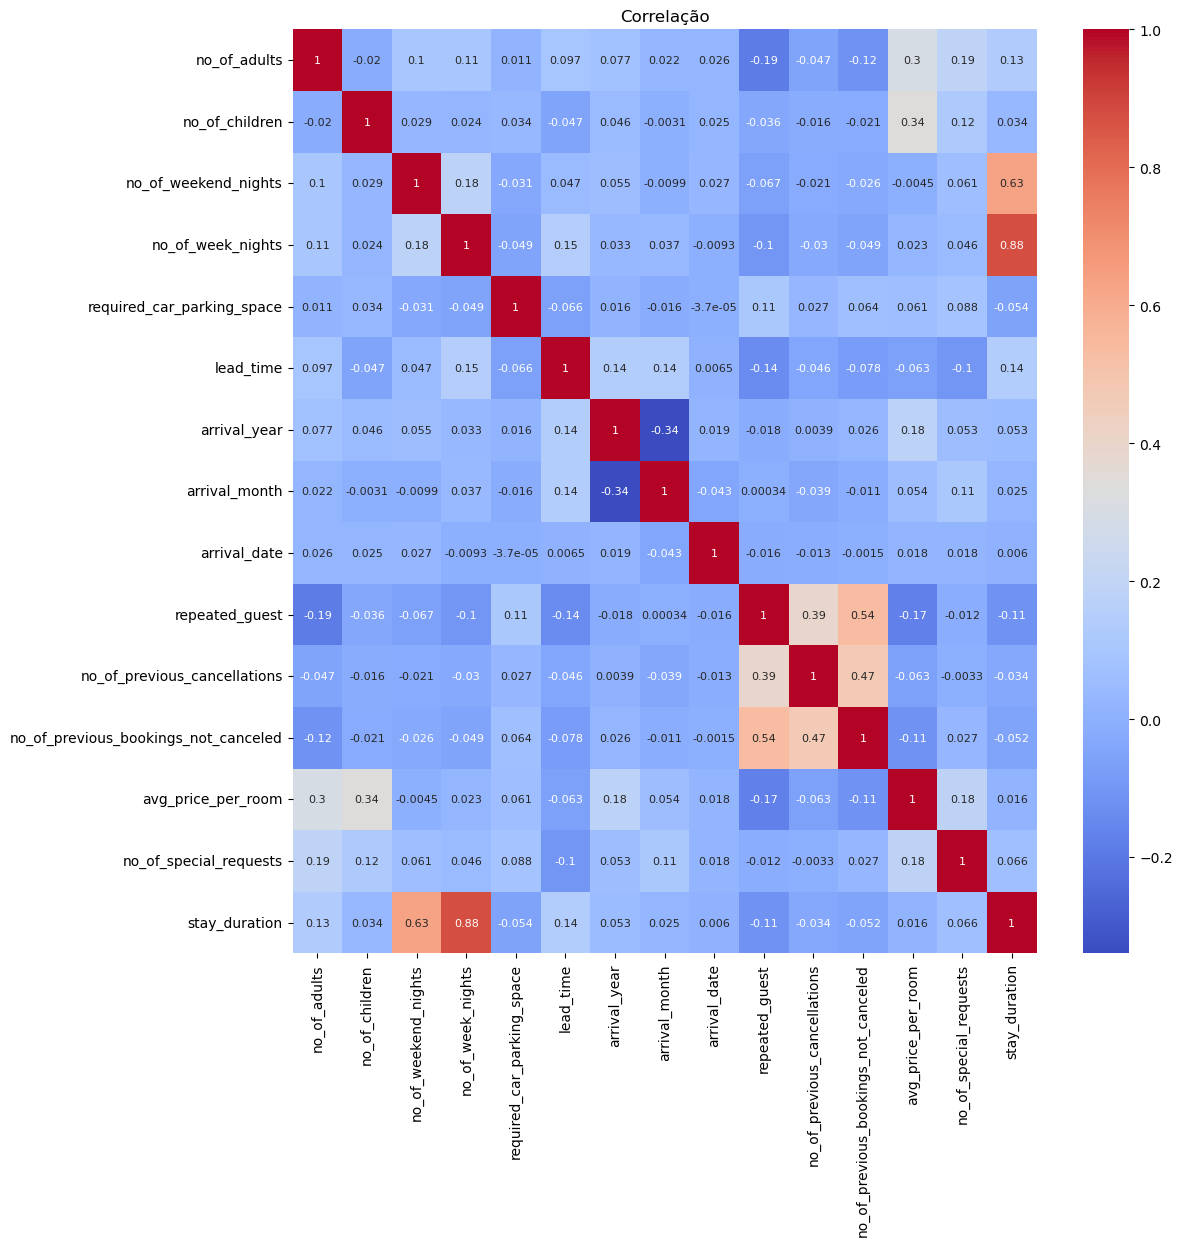

In [24]:
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

corr = df[colunas_numericas].corr()

plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, cmap= 'coolwarm', annot_kws= {"size": 8})
plt.title('Correlação')
plt.show()

## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.

In [33]:
df['Booking_ID'] = df['Booking_ID'].str.extract(r'(\d+)')

df[['Booking_ID']]

,Booking_ID
0,00001
1,00002
2,00003
3,00004
4,00005
...,...
36270,36271
36271,36272
36272,36273
36273,36274


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

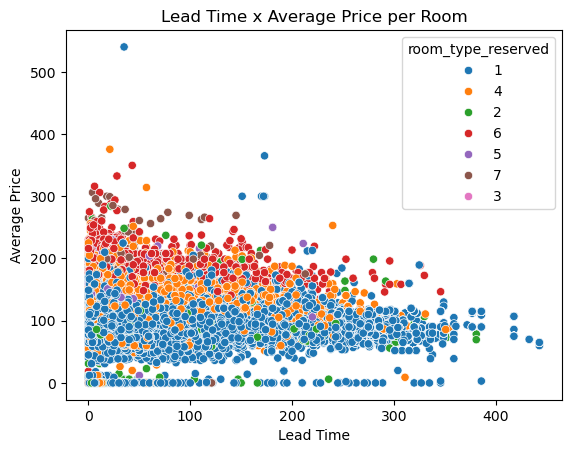

In [38]:
sns.scatterplot(df, x= 'lead_time', y= 'avg_price_per_room', hue= 'room_type_reserved')
plt.title('Lead Time x Average Price per Room')
plt.xlabel('Lead Time')
plt.ylabel('Average Price')
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [42]:
preco_medio_por_tipo_quarto = df.groupby('room_type_reserved')['avg_price_per_room'].mean()

print(round(preco_medio_por_tipo_quarto, 2))

room_type_reserved
1     95.92
2     87.85
3     73.68
4    125.29
5    123.73
6    182.21
7    155.20
Name: avg_price_per_room, dtype: float64


## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

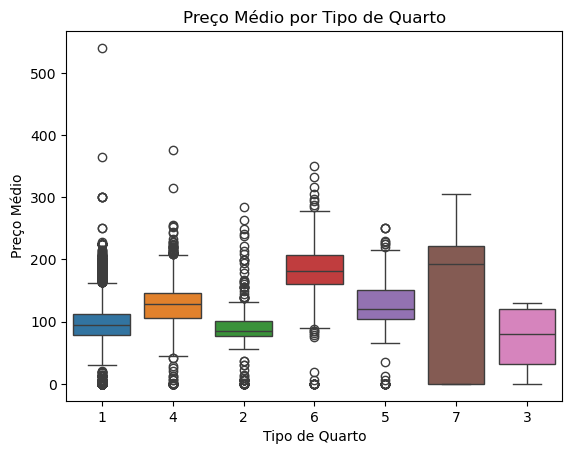

In [46]:
sns.boxplot(data= df, x= 'room_type_reserved', y= 'avg_price_per_room', hue= 'room_type_reserved')
plt.title('Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio')
plt.show()